In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 10. N차원 배열 다루기</font><b>
# 4. 복사와 뷰
## 4.1. 할당 (Assignment)

In [2]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
b = a
a.shape, a.ndim, id(a), type(a)

((12,), 1, 1924132761840, numpy.ndarray)

In [5]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 1924132761840, numpy.ndarray)

In [6]:
a is b #True면 같은 객체

True

In [7]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
np.all(a==b)

True

In [10]:
b.shape = (3,4) #할당받은 b의 shape를 수정

In [11]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 1924132761840, numpy.ndarray)

In [12]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 1924132761840, numpy.ndarray)

In [13]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
a.reshape(2,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## 4.2. 얕은 복사 (View)

In [15]:
c = a.view() #얕은 복사
print(id(a), id(c))

1922049988656 1922022958896


In [16]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [17]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
c[1, ::2] = [9, 9, 9]

In [20]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [21]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3. 깊은 복사 (Copy)

In [34]:
a = np.array([[5, 4, 13, 0],
            [60, 6, 16, 1],
            [20, 5, 14, 0]])
a

array([[ 5,  4, 13,  0],
       [60,  6, 16,  1],
       [20,  5, 14,  0]])

In [35]:
#X = a[:, :-1] #슬라이싱할 때, View가 반환(얕은 복사), 원본과 연결
X = a[:, :-1].copy() #깊은 복사
X = np.array(a[:,:-1], copy=True) #깊은 복사
X

array([[ 5,  4, 13],
       [60,  6, 16],
       [20,  5, 14]])

In [36]:
X[:,0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [37]:
a

array([[ 5,  4, 13,  0],
       [60,  6, 16,  1],
       [20,  5, 14,  0]])

# 5. 고급 인덱싱

## 5.1. 인덱스 배열로 인덱싱

In [11]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [5]:
#슬라이싱 불가한 인덱스 조합은 리스트로 넣어서
a[ [0,5,9] ]

array([ 0, 25, 81])

In [7]:
#인덱싱하기 위한 값을 배열로 만들기
i = np.array([0,1,1,9])
a[i] #결과는 i(인덱싱배열)의 형태로 따라감

array([ 0,  1,  1, 81])

In [8]:
i = np.array([[0,1], 
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [12]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [13]:
a[i] += 10
a #두 번 인덱싱된 1번 item에 두 번 연산하지 않음.

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [14]:
palette = np.array([[0,0,0], #black (0)
                    [255, 0, 0], #red (1)
                    [0, 255, 0], #green (2)
                    [0, 0, 255], #blue (3)
                    [255, 255, 255]]) #white (4)

In [15]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [16]:
image_data = palette[image_index]

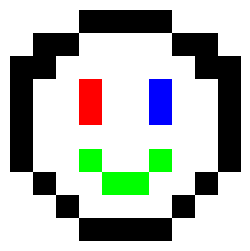

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(3,3))
plt.imshow(image_data, interpolation='nearest')
plt.axis('off')
plt.show()

## 5.2. 논리 배열을 이용한 인덱싱

In [22]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [23]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [24]:
a[a%2==0] #논리 배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [25]:
a[a>15]

array([16, 17, 18, 19])

# 6. 선형대수
- 2차원 NumPy 배열을 행렬
    - 행렬곱 : @
    - 단위행렬 : np.eye(n) : n행n열 단위행렬
    - 전치행렬 : X.T, X.transpose()

In [26]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [27]:
#a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [28]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [30]:
#정방행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],
             [3,4,1]])
#np.linalg.inv(a) 에러
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [31]:
#전치행렬을 곱하면 정방행렬로
a @ a.T

array([[ 6, 12],
       [12, 26]])

## 6.1. 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2

## 6.2. 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터n

In [32]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

In [34]:
#1. 각 변수별 평균

In [35]:
#2. 처음 다섯 개 행

In [36]:
#3. 처음 다섯 개 행에서 마지막 열 제외

In [ ]:
#4. 